In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import config
import time
import random

In [4]:
data_dictionary = {
    "School": [],
    "City": [],
    "State": [],
    "Region": [],
    "In-State-Tuition": [],
    "Out-of-State-Tuition": [],
    "Control": [],
    "Highest-Degree": [],
    "Predominant-Degree": []
}

page_num = 0
make_call = True

while make_call:

    base_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?"
    fields = "school.name,school.city,school.state,latest.school.degrees_awarded.predominant,latest.school.degrees_awarded.highest,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.school.region_id,latest.school.ownership"
    api_request = f"https://api.data.gov/ed/collegescorecard/v1/schools.json?fields={fields}&api_key={config.API_KEY}&page={page_num}&_per_page=100"

    re = requests.get(api_request)
    data = re.json()

    if data['results'] != []:
        for school in data['results']:

            if (school['latest.school.region_id'] == 0 or
                school['latest.school.region_id'] == 9 or
                school['latest.school.degrees_awarded.highest'] == 0 or
                school['latest.school.degrees_awarded.highest'] == 1
                ):

                continue

            data_dictionary["School"].append(school['school.name'])
            data_dictionary["City"].append(school['school.city'])
            data_dictionary["State"].append(school['school.state'])
            data_dictionary["Predominant-Degree"].append(school['latest.school.degrees_awarded.predominant'])
            data_dictionary["Highest-Degree"].append(school['latest.school.degrees_awarded.highest'])
            data_dictionary["Control"].append(school['latest.school.ownership'])
            data_dictionary["Region"].append(school['latest.school.region_id'])
            data_dictionary["In-State-Tuition"].append(school['latest.cost.tuition.in_state'])
            data_dictionary["Out-of-State-Tuition"].append(school['latest.cost.tuition.out_of_state'])

        page_num+=1

    else:
        make_call = False

time.sleep(random.randint(0, 3))


In [5]:
tuition_df = pd.DataFrame(data_dictionary)
tuition_df.dropna(how='any', inplace=True)

In [6]:
import plotly_express as px

In [7]:
state_df = tuition_df.groupby(["State"]).median()

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_72641/381422436.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_df = tuition_df.groupby(["State"]).median()


In [8]:
px.choropleth(data_frame=state_df,
              color="In-State-Tuition",
              locationmode="USA-states",
              locations=state_df.index,
              scope='usa',
              color_continuous_scale=[(0, 'green'), (0.5, 'yellow'), (1, 'red')]
    )

In [10]:
state_df.sort_values(by="In-State-Tuition").head(10)

,Region,In-State-Tuition,Out-of-State-Tuition,Control,Highest-Degree,Predominant-Degree
State,,,,,,
NM,6.0,2106.0,5348.5,1.0,2.0,2.0
WY,7.0,4601.5,10901.5,1.0,2.0,2.0
MT,7.0,4911.5,11203.5,1.0,3.0,2.0
WA,8.0,5740.0,10428.0,1.0,3.0,2.0
HI,8.0,6068.0,8420.0,1.0,3.0,2.0
NC,5.0,6084.0,9006.0,1.0,3.0,3.0
AZ,6.0,6095.0,9522.0,1.0,2.0,2.0
ND,4.0,6801.5,7757.5,1.0,4.0,2.0
MS,5.0,7068.0,7670.0,1.0,3.0,3.0


# Overall bachelors degree affordability

In [11]:
bachelor_df = tuition_df[tuition_df["Predominant-Degree"] == 3]
bachelor_df = bachelor_df.groupby(["State"]).median()

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_72641/1473999880.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [12]:
px.choropleth(data_frame=bachelor_df,
              color="In-State-Tuition",
              locationmode="USA-states",
              locations=state_df.index,
              scope='usa',
              color_continuous_scale=[(0, 'green'), (0.5, 'yellow'), (1, 'red')]
    )

In [13]:
bachelor_df.sort_values(by="In-State-Tuition").head(10)

,Region,In-State-Tuition,Out-of-State-Tuition,Control,Highest-Degree,Predominant-Degree
State,,,,,,
WY,7.0,6277.0,20827.0,1.0,4.0,3.0
NM,6.0,7301.0,16200.0,1.0,4.0,3.0
MT,7.0,7480.0,24691.0,1.0,4.0,3.0
ID,7.0,8340.0,24980.0,2.0,4.0,3.0
WV,5.0,8886.0,18224.0,2.0,4.0,3.0
UT,7.0,8926.5,17112.0,2.0,4.0,3.0
MS,5.0,9220.0,11204.0,2.0,4.0,3.0
SD,4.0,9633.0,12942.0,2.0,4.0,3.0
AK,8.0,9761.0,21072.0,1.5,4.0,3.0


# Affordability by Region

In [14]:
region_rename = {
    1: "New England (CT, ME, MA, NH, RI, VT)",
    2: "Mid East (DE, DC, MD, NJ, NY, PA)",
    3: "Great Lakes (IL, IN, MI, OH, WI)",
    4: "Plains (IA, KS, MN, MO, NE, ND, SD)",
    5: "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
    6: "Southwest (AZ, NM, OK, TX)",
    7: "Rocky Mountains (CO, ID, MT, UT, WY)",
    8: "Far West (AK, CA, HI, NV, OR, WA)"
}

tuition_df['Region'] = tuition_df["Region"].map(region_rename)

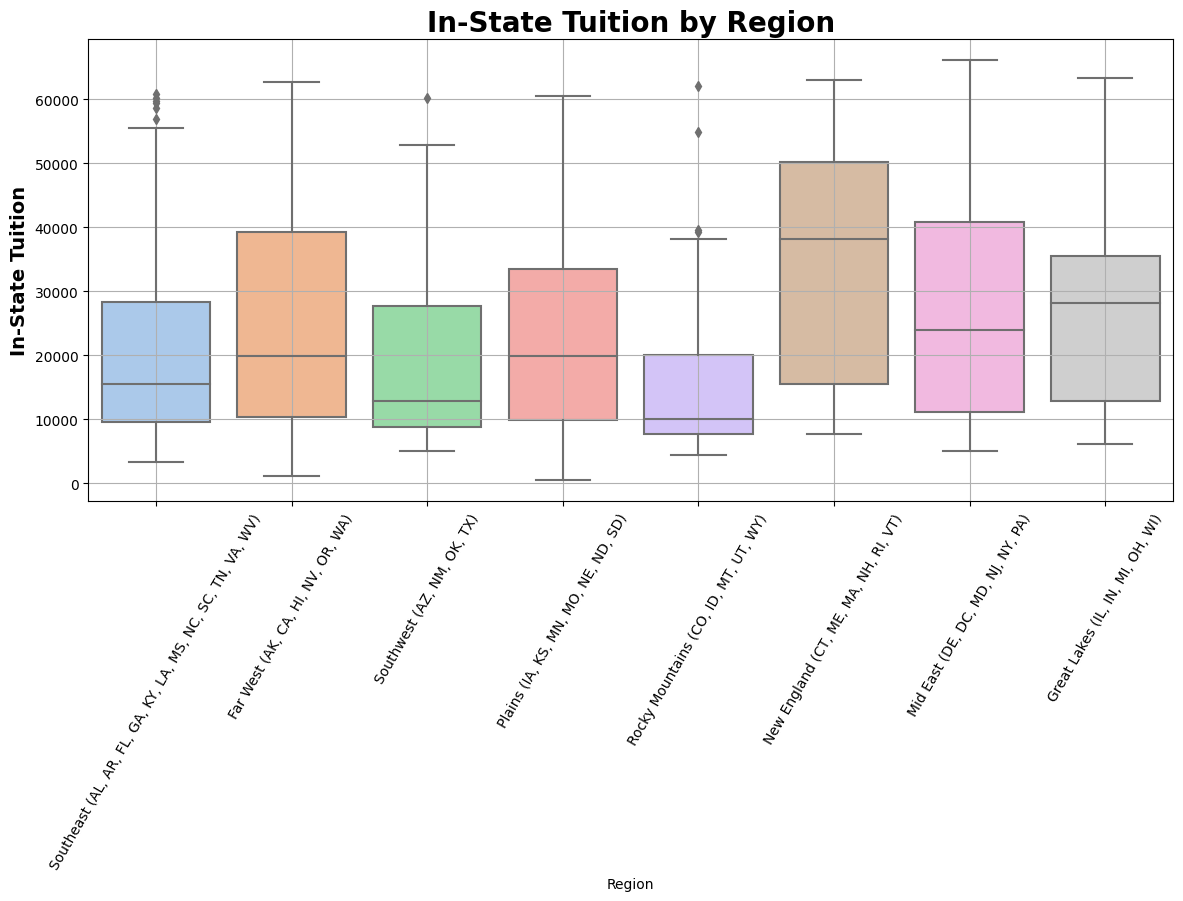

In [15]:
region_df = tuition_df[tuition_df["Predominant-Degree"] == 3]

fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(ax=ax, data=region_df, y="In-State-Tuition", x="Region", palette='pastel')

ax.set_ylabel('In-State Tuition', fontsize=14, weight='bold')
ax.set_xticklabels(labels=region_df['Region'].unique(), rotation=60)

ax.set_title('In-State Tuition by Region', fontsize=20, weight='bold')
ax.grid(True)



In [16]:
tuition_df.groupby(["Region"]).median().sort_values(by="In-State-Tuition")

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_72641/1434775010.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,In-State-Tuition,Out-of-State-Tuition,Control,Highest-Degree,Predominant-Degree
Region,,,,,
"Rocky Mountains (CO, ID, MT, UT, WY)",7416.0,15478.0,1.0,3.0,3.0
"Far West (AK, CA, HI, NV, OR, WA)",7685.5,12596.0,1.0,3.0,2.0
"Southwest (AZ, NM, OK, TX)",7812.0,13363.0,1.0,3.0,3.0
"Plains (IA, KS, MN, MO, NE, ND, SD)",9806.0,14475.0,2.0,4.0,3.0
"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",10350.0,15240.0,2.0,3.0,3.0
"Great Lakes (IL, IN, MI, OH, WI)",13342.0,17340.0,2.0,3.0,3.0
"Mid East (DE, DC, MD, NJ, NY, PA)",14675.0,18454.0,2.0,4.0,3.0
"New England (CT, ME, MA, NH, RI, VT)",22490.0,32813.0,2.0,4.0,3.0


In [17]:
region_df[region_df["Region"] == "Rocky Mountains (CO, ID, MT, UT, WY)"].sort_values(by="In-State-Tuition").head(15).reset_index(drop=True)

,School,City,State,Region,In-State-Tuition,Out-of-State-Tuition,Control,Highest-Degree,Predominant-Degree
0,Brigham Young University-Idaho,Rexburg,ID,"Rocky Mountains (CO, ID, MT, UT, WY)",4416.0,4416.0,2,3,3
1,The University of Montana-Western,Dillon,MT,"Rocky Mountains (CO, ID, MT, UT, WY)",5726.0,17190.0,1,3,3
2,Utah Tech University,Saint George,UT,"Rocky Mountains (CO, ID, MT, UT, WY)",5862.0,16986.0,1,4,3
3,Montana State University-Northern,Havre,MT,"Rocky Mountains (CO, ID, MT, UT, WY)",5955.0,18665.0,1,4,3
4,Montana State University Billings,Billings,MT,"Rocky Mountains (CO, ID, MT, UT, WY)",6022.0,19352.0,1,4,3
5,Brigham Young University,Provo,UT,"Rocky Mountains (CO, ID, MT, UT, WY)",6120.0,6120.0,2,4,3
6,University of Wyoming,Laramie,WY,"Rocky Mountains (CO, ID, MT, UT, WY)",6277.0,20827.0,1,4,3
7,Southern Utah University,Cedar City,UT,"Rocky Mountains (CO, ID, MT, UT, WY)",6726.0,20542.0,1,4,3
8,Lewis-Clark State College,Lewiston,ID,"Rocky Mountains (CO, ID, MT, UT, WY)",6982.0,20238.0,1,3,3
9,Montana Technological University,Butte,MT,"Rocky Mountains (CO, ID, MT, UT, WY)",7400.0,22570.0,1,4,3
